In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
import pandas as pd

# Supondo que 'data' seja o seu DataFrame e 'engine_capacity' seja o nome da coluna
# Substitua 'data' e 'engine_capacity' com os seus dados reais
valores_unicos = df['mileage'].unique()

print("Valores únicos na coluna 'engine_capacity':")
print(valores_unicos)


Valores únicos na coluna 'engine_capacity':
['23.84 kmpl' '17.5 kmpl' '17.4 kmpl' '14.08 kmpl' '21.4 kmpl'
 '17.66 kmpl' '17.52 kmpl' '16.09 kmpl' '22.48 kmpl' '18.24 kmpl'
 '21.74 kmpl' '19.27 kmpl' '23.01 kmpl' '21.5 kmpl' '22.38 kmpl' '18 kmpl'
 '22.41 kmpl' '11 kmpl' '27.39 kmpl' '16.55 kmpl' '19 kmpl' '23.59 kmpl'
 '15.1 kmpl' '18.6 kmpl' nan '20.36 kmpl' '16.38 kmpl' '18.2 kmpl'
 '22.77 kmpl' '17 kmpl' '17.6 kmpl' '18.15 kmpl' '19.34 kmpl' '11.3 kmpl'
 '20.7 kmpl' '22.9 kmpl' '14.84 kmpl' '20.71 kmpl' '17.7 kmpl' '15.8 kmpl'
 '17.05 kmpl' '18.16 kmpl' '16 kmpl' '18.7 kmpl' '14.8 kmpl' '15.74 kmpl'
 '18.3 kmpl' '15.6 kmpl' '15.68 kmpl' '18.9 kmpl' '24.2 kmpl' '14.11 kmpl'
 '16.35 kmpl' '22.05 kmpl' '17.01 kmpl' '23.95 kmpl' '19.17 kmpl'
 '17.8 kmpl' '20 kmpl' '26.1 kmpl' '19.67 kmpl' '12.8 kmpl' '22.07 kmpl'
 '26.2 kmpl' '18.06 kmpl' '14.5 kmpl' '34.05 kmpl' '20.51 kmpl' '33 kmpl'
 '13.68 kmpl' '16.36 kmpl' '25.8 kmpl' '17.3 kmpl' '21.21 kmpl'
 '16.47 kmpl' '13.9 kmpl' '23 kmpl' '

In [4]:
# SEATS __________________________________________________
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


# ENGINE __________________________________________________
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')

# FUEL TYPE __________________________________________________
valores_unicos_fuel_type = df['fuel_type'].unique()
print()
print(valores_unicos_fuel_type)

# KMS __________________________________________________
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

# MAX POWER 
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)

Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]
df['max_power'] = Correct_Max_Power



# MILEAGE __________________________________________________
consumo_correto = []

for i in df['mileage']:
    match = re.search(r'(\d+.\d+|\d+)', str(i))

    if match:
        valor = float(match.group())

        if 'km/kg' in str(i):
            valor *= 1.40

        consumo_correto.append(valor if pd.notnull(i) else None)

while len(consumo_correto) < len(df):
    consumo_correto.append(None)

df['mileage'] = consumo_correto

media_mileage = df['mileage'].astype(float).mean()
df['mileage'].fillna(media_mileage, inplace=True)






Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI

Distinct full names with blank seats:

['Petrol' 'Diesel' 'CNG' 'Electric' 'LPG']


In [5]:
#FullName ______________________________________

#ANO
# Extract the year and create a new column
df['ano'] = df['full_name'].str.extract(r'(\d{4})')

# Display the resulting DataFrame
print(df['ano'])

#MARCA
# Extract the first word after the year and create a new column
df['marca'] = df['full_name'].str.extract(r'\d{4}\s(\w+)')

# Print the resulting DataFrame
print(df['marca'])

#MODELO
# Get everything that comes after "marca"
df['modelo'] = df['full_name'].str.extract(r'\d{4}\s\w+\s(.+)')

# Print the resulting DataFrame
print(df['modelo'])

0        2019
1        2018
2        2015
3        2021
4        2019
         ... 
13951    2021
13952    2017
13953    2017
13954    2017
13955    2015
Name: ano, Length: 13956, dtype: object
0           Tata
1          Honda
2          Honda
3           Tata
4         Maruti
          ...   
13951        Kia
13952    Hyundai
13953      Skoda
13954     Maruti
13955      Honda
Name: marca, Length: 13956, dtype: object
0                                        Tiago XZ Plus
1                                       WR-V i-VTEC VX
2                                       City i VTEC SV
3        New Safari XZA Plus Adventure Edition AT BSVI
4                                  Baleno 1.2 CVT Zeta
                             ...                      
13951                                 Carnival Premium
13952                          i20 1.2 Magna Executive
13953                      Rapid 1.5 TDI Ambition BSIV
13954                                Vitara Brezza ZDi
13955                      

In [6]:
#BODY TYPE ----------------------
#Replace the missing types and the ones that were wrong
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',
                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',
                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'
df.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', 
                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'
df.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'
df.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '2007 Maruti SX4 Vxi BSIII',
                             '2020 Mercedes-Benz S-Class Maybach S560', '2004 Skoda Octavia 1.8 Turbo Petrol RS MT']), 'body_type'] = 'Sedan'
df.loc[df['full_name'].isin(['2012 Mercedes-Benz SLK-Class SLK 350', '2013 Mercedes-Benz E-Class E350 Cabriolet', 
                             '2009 Mercedes-Benz SLK-Class 55 AMG']), 'body_type'] = 'Convertibles'
df.loc[df['full_name'] == '2011 Jaguar XK R V8 Coupe', 'body_type'] = 'Coupe'
df.loc[df['full_name'].isin(['2015 Chevrolet Enjoy 1.4 LS 7', '2004 Maruti Versa DX2 8-SEATER BSIII TWIN A/C', '2021 Maruti Eeco 5 STR With AC Plus HTR CNG',
                             '2022 Maruti Eeco 5 Seater AC 2020-2022', '2022 Maruti Eeco 5 Seater AC BSVI', '2017 Maruti Eeco Flexi Green', 
                             '2013 Maruti Omni Limited Edition', '2021 Maruti Eeco CNG 5 Seater AC', '2019 Maruti Eeco CNG 5 Seater AC BSIV', 
                             '2019 Maruti Eeco 5 Seater AC', '2013 Maruti Eeco 5 Seater Standard BSIV', '2015 Maruti Omni CNG', 
                             '2015 Maruti Omni MPI CARGO BSIV', '2016 Maruti Eeco CNG 5 Seater AC BSIV', '2013 Toyota Innova 2.5 E Diesel MS 7-seater',
                             '2015 Chevrolet Enjoy 1.4 LS 7']), 'body_type'] = 'Minivans'
df.loc[df['full_name'].isin(['2014 Tata Xenon XT EX 4X2', '2019 Isuzu D-Max High']), 'body_type'] = 'Pickup'

# Check
distinct_full_names_with_blank_body_type = df[df['body_type'].isnull()]['full_name'].unique()
print('Distinct full names with blank body_type:')
for full_name in distinct_full_names_with_blank_body_type:
    print(full_name)

Distinct full names with blank body_type:


In [7]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'body_type': 'string',
    'mileage': float,
})

In [8]:

novo_valor = df['mileage'].mean()
df['mileage'] = df['mileage'].fillna(novo_valor)

In [9]:
novo_valor = df['engine_capacity'].mean()
df['engine_capacity'] = df['engine_capacity'].fillna(novo_valor)

In [10]:
novo_valor = df['max_power'].mean()
df['max_power'] = df['max_power'].fillna(novo_valor)

In [11]:
novo_valor = df['kms_driven'].mean()
df['kms_driven'] = df['kms_driven'].fillna(novo_valor)

In [12]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                    object
registered_year              object
engine_capacity             float64
insurance                    object
transmission_type            object
kms_driven                  float64
owner_type                   object
fuel_type                    object
max_power                   float64
seats                       float64
mileage                     float64
body_type            string[python]
city                         object
resale_price_Lakh           float64
ano                         float64
marca                string[python]
modelo               string[python]
dtype: object


In [13]:
df = df.dropna(subset=['registered_year'])
# MARCA __________________________________________________
df = df.dropna(subset=['marca'])
# MODELO __________________________________________________
df = df.dropna(subset=['modelo'])

In [14]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
   
})

In [15]:
contagem_nulos = df.isnull().sum()

print(f"O número de valores nulos na coluna é: {contagem_nulos}")

O número de valores nulos na coluna é: full_name            0
registered_year      0
engine_capacity      0
insurance            5
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
resale_price_Lakh    0
ano                  0
marca                0
modelo               0
dtype: int64


In [16]:
import pandas as pd

# Supondo que 'data' seja o seu DataFrame e 'engine_capacity' seja o nome da coluna
# Substitua 'data' e 'engine_capacity' com os seus dados reais
valores_unicos = df['engine_capacity'].unique()

print("Valores únicos na coluna 'engine_capacity':")
print(valores_unicos)


Valores únicos na coluna 'engine_capacity':
[1199.         1497.         1956.         1197.         2993.
 1598.         1995.          999.         1248.         2498.
 1194.         1364.         2179.         1451.         1999.
 1498.         1591.         1582.         1462.         1198.
 1493.          799.         1499.         1196.          995.
 1482.         1991.          998.         2199.          796.
 2494.         1423.17014412 2393.         1298.         1799.
 1396.         1086.          814.         1798.         1968.
 2982.         1120.         2477.         1985.         3198.
 1461.         1193.         1373.          936.         1399.
 1353.            0.         2967.         1896.         1997.
 2354.          624.         1186.         2650.         1395.
 1368.         1390.         1797.         2694.         1061.
 1330.         1047.         2755.         1794.         1969.
 2487.         1496.         1586.         2400.         2523.
 2835.     

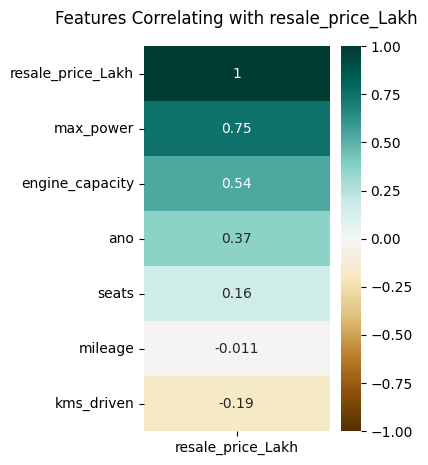

In [17]:
#correlation  

# Select columns
columns_of_interest = ['mileage','ano','seats','engine_capacity','kms_driven','max_power','resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

In [18]:
#Export
#Not the target
colunas_selecionadas = ['mileage','ano','seats','engine_capacity','kms_driven','max_power','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('Acenario2Ideia.csv', index=False)